# Análisis de datos.

In [1]:
import pyodbc
import pandas as pd
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en el DataFrame
# Configuración de conexiones
AZURE_SERVER = 'uaxmathfis.database.windows.net'
AZURE_DATABASE = 'usecases'
AZURE_DRIVER = '{ODBC Driver 17 for SQL Server}'
AZURE_AUTH = 'Authentication=ActiveDirectoryInteractive'

# Crear conexión
conn = pyodbc.connect(f"DRIVER={AZURE_DRIVER};SERVER={AZURE_SERVER};DATABASE={AZURE_DATABASE};{AZURE_AUTH}", timeout=10)

# Escribir la consulta SQL
query = """
    SELECT * FROM [usecases].DATAEX.[IA_Client_segment_MODIFICADO]
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df = pd.read_sql(query, conn)
df.set_index('ID', inplace=True)  # Establecer la columna 'ID' como índice del DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

C:\Users\josit\AppData\Local\Temp\ipykernel_17560\2020501176.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,NaN
CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,NaN


In [2]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos = df['Campanna_anno'].unique()
valores_unicos

array([nan,  5.,  3.,  4.,  1.])

In [3]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_2 = df['Profesion'].unique()
valores_unicos_2

array(['Ingeniero', 'Medico', 'Artista', 'Funcionario', 'Otros',
       'Ejecutivo', 'Construccion', 'Negocios/empresa', 'Servicios'],
      dtype=object)

In [4]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_3 = df['Gastoscore'].unique()
valores_unicos_3

array(['Bajo', 'Medio', 'Alto'], dtype=object)

In [5]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Provincia'].unique()
valores_unicos_4

array(['Segovia', 'Alicante', 'Toledo', 'Leon', 'LLeida', 'Ciudad Real',
       'i\x81vila', 'Guipiºzcoa', 'Vizcaya', 'Orense', 'Castellon',
       'Pontevedra', 'Almeri\xada', 'Valladolid', 'Jaen', 'Lugo',
       'Santa Cruz de Tenerife', 'Albacete', 'Huelva', 'Salamanca',
       'Ceuta', 'Baleares', 'Gerona', 'Barcelona', 'Sevilla',
       'Guadalajara', 'Soria', 'Caceres', 'Madrid', 'Cordoba', 'Burgos',
       'Cadiz', 'Navarra', 'Melilla', 'Granada', 'Badajoz', 'Valencia',
       'Tarragona', 'La Corui±a', 'Las Palmas', 'Murcia', 'Palencia',
       'La Rioja', 'Teruel', 'Zamora', 'Zaragoza', 'i\x81lava', 'Cuenca',
       'Huesca', 'Malaga'], dtype=object)

In [6]:
provincia_to_comunidad = {
    'i\x81vila': 'Castilla y León',
    'Álava': 'País Vasco',
    'i\x81lava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Guipiºzcoa': 'País Vasco',
    'Baleares': 'Islas Baleares',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Caceres': 'Extremadura',
    'Cadiz': 'Andalucía',
    'Castellon': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Cordoba': 'Andalucía',
    'La Coruña': 'Galicia',
    'Cuenca': 'Castilla-La Mancha',
    'Gerona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Jaen': 'Andalucía',
    'Leon': 'Castilla y León',
    'LLeida': 'Cataluña',
    'La Rioja': 'La Rioja',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Malaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Orense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Las Palmas': 'Canarias',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Ceuta': 'Ceuta'
}

# Corregir nombres de provincias mal codificadas
df['Provincia'] = df['Provincia'].str.replace('i\x81', 'Á')  # Ej: i\x81vila → Ávila
df['Provincia'] = df['Provincia'].str.replace('i\x81lava', 'Álava')
df['Provincia'] = df['Provincia'].str.replace('Almeri\xada', 'Almería')
df['Provincia'] = df['Provincia'].str.replace('Guipiºzcoa', 'Guipúzcoa')
df['Provincia'] = df['Provincia'].str.replace('La Corui±a', 'La Coruña')

# Mapear a Comunidad Autónoma
df['Comunidad'] = df['Provincia'].map(provincia_to_comunidad)
df.drop(columns=['Provincia'], inplace=True)

In [7]:
# Definir la clasificación
zonas = {
    'Norte': ['Galicia', 'País Vasco', 'Navarra', 'La Rioja'],
    'Sur': ['Andalucía', 'Extremadura', 'Región de Murcia', 'Canarias', 'Ceuta', 'Melilla'],
    'Este': ['Cataluña', 'Comunidad Valenciana', 'Islas Baleares', 'Aragón'],
    'Oeste': ['Castilla y León', 'Castilla-La Mancha', 'Comunidad de Madrid']
}
df['Zona'] = df['Comunidad'].map(
    {comunidad: zona for zona, comunidades in zonas.items() for comunidad in comunidades}
)
df[df['Zona'].isna()]['Comunidad'].unique()

array([], dtype=object)

In [8]:
df.drop(columns=['Comunidad'], inplace=True)

In [9]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Profesion'].unique()
valores_unicos_4

array(['Ingeniero', 'Medico', 'Artista', 'Funcionario', 'Otros',
       'Ejecutivo', 'Construccion', 'Negocios/empresa', 'Servicios'],
      dtype=object)

In [10]:
sectores_macro = {
    'Tecnología/Industria': ['Ingeniero', 'Construccion'],
    'Salud/Bienestar': ['Medico'],
    'Arte/Cultura': ['Artista'],
    'Administración/Servicios Públicos': ['Funcionario', 'Servicios'],
    'Empresa/Finanzas': ['Ejecutivo', 'Negocios/empresa'],
    'Otros': ['Otros'],
}

# Invertir el diccionario para mapear
profesion_a_sector = {prof: sector for sector, profesiones in sectores_macro.items() for prof in profesiones}
df['Sector_Macro'] = df['Profesion'].map(profesion_a_sector)
df[['Profesion', 'Sector_Macro']].drop_duplicates().sort_values('Sector_Macro')
df[df['Sector_Macro'].isna()]['Profesion'].unique() # Ver profesiones sin sector asignado

array([], dtype=object)

In [11]:
df.drop(columns=['Profesion'], inplace=True)  # Eliminar la columna 'Profesion' si no es necesaria

In [12]:
df.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona,Sector_Macro
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,NaN,Oeste,Tecnología/Industria
CLI100,M,Si,64,Si,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Este,Salud/Bienestar
CLI1000,M,Si,65,Si,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Oeste,Arte/Cultura
CLI10000,M,No,33,No,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Oeste,Administración/Servicios Públicos
CLI10001,M,Si,52,No,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,NaN,Este,Otros


In [13]:
# Contar valores nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos

Genero                          0
Casado                        190
Edad                            0
Graduado                      103
Experiencia_laboral             0
Gastoscore                      0
Family_Size                     0
anno_nacimiento                 0
Generacion                      0
Ingresos_anuales_brutos         0
Digital_encuesta                0
Gasto_medio_mensual_cuota       0
Abandono                        0
Dias_cliente                    0
Campanna_anno                5707
Zona                            0
Sector_Macro                    0
dtype: int64

In [14]:
# Eliminar filas con nulos en 'Casado' o 'Graduado' y asegurar copia
df_clean = df.dropna(subset=['Casado', 'Graduado']).copy()

# Rellenar nulos en 'Campanna_anno' sin warnings
df_clean['Campanna_anno'] = df_clean['Campanna_anno'].fillna(0)

# Verificar cuántas filas se eliminaron
print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar nulos: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas originales: 10806
Filas después de eliminar nulos: 10518
Filas eliminadas: 288


In [15]:
df_clean.isnull().sum()

Genero                       0
Casado                       0
Edad                         0
Graduado                     0
Experiencia_laboral          0
Gastoscore                   0
Family_Size                  0
anno_nacimiento              0
Generacion                   0
Ingresos_anuales_brutos      0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
Abandono                     0
Dias_cliente                 0
Campanna_anno                0
Zona                         0
Sector_Macro                 0
dtype: int64

In [16]:
df_clean.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona,Sector_Macro
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,0.0,Oeste,Tecnología/Industria
CLI100,M,Si,64,Si,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Este,Salud/Bienestar
CLI1000,M,Si,65,Si,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Oeste,Arte/Cultura
CLI10000,M,No,33,No,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Oeste,Administración/Servicios Públicos
CLI10001,M,Si,52,No,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,0.0,Este,Otros


In [17]:
df_clean.nunique()

Genero                          2
Casado                          2
Edad                           69
Graduado                        2
Experiencia_laboral             3
Gastoscore                      3
Family_Size                     9
anno_nacimiento                67
Generacion                      4
Ingresos_anuales_brutos      9667
Digital_encuesta              185
Gasto_medio_mensual_cuota       5
Abandono                        2
Dias_cliente                  571
Campanna_anno                   5
Zona                            4
Sector_Macro                    6
dtype: int64

In [18]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 25 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: Edad, Family_Size, anno_nacimiento, Ingresos_anuales_brutos, Digital_encuesta, Gasto_medio_mensual_cuota, Dias_cliente, Campanna_anno
Variables categóricas: Genero, Casado, Graduado, Experiencia_laboral, Gastoscore, Generacion, Abandono, Zona, Sector_Macro


In [19]:
df_clean[v_categoricas].nunique()

Genero                 2
Casado                 2
Graduado               2
Experiencia_laboral    3
Gastoscore             3
Generacion             4
Abandono               2
Zona                   4
Sector_Macro           6
dtype: int64

In [20]:
for i in v_categoricas:
    print(i, df_clean[i].unique()) 

Genero ['F' 'M']
Casado ['Si' 'No']
Graduado ['Si' 'No']
Experiencia_laboral ['+20annos' '10-20annos' '<10annos']
Gastoscore ['Bajo' 'Medio' 'Alto']
Generacion ['Generacion X' 'Millennials' 'Generacion Silenciosa' 'Generacion Z']
Abandono [ True False]
Zona ['Oeste' 'Este' 'Norte' 'Sur']
Sector_Macro ['Tecnología/Industria' 'Salud/Bienestar' 'Arte/Cultura'
 'Administración/Servicios Públicos' 'Otros' 'Empresa/Finanzas']


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_clean2 = df_clean.copy()

# --- Label Encoding para categóricas binarias ---
label_cols = ['Genero', 'Casado', 'Graduado', "Abandono" ]
le = LabelEncoder()
for col in label_cols:
    df_clean2[col] = le.fit_transform(df_clean2[col])

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Columnas a codificar
ordinal_cols = ['Experiencia_laboral', 'Generacion', 'Gastoscore']

# Definimos el orden lógico de cada categoría
orden_experiencia = ['<10annos', '10-20annos', '+20annos']
orden_generacion = ['Generacion Silenciosa', 'Generacion X', 'Millennials', 'Generacion Z']
orden_gastoscore = ['Bajo', 'Medio', 'Alto']

# Combinamos los órdenes en una lista
ordenes = [orden_experiencia, orden_generacion, orden_gastoscore]

# Instanciamos el encoder con los órdenes
oe = OrdinalEncoder(categories=ordenes)


In [23]:
# Aplicar OrdinalEncoder
df_clean2[ordinal_cols] = oe.fit_transform(df_clean2[ordinal_cols])


In [24]:
# Asumimos que 'onehot_vars' son las columnas a convertir en variables dummies
onehot_vars = ['Zona', 'Sector_Macro']

# Aplicar One-Hot Encoding a las columnas seleccionadas en df_clean2
df_clean2 = pd.get_dummies(df_clean2, columns=onehot_vars, drop_first=False)

# Convertir las columnas que no son dummies a tipo int
df_clean2[df_clean2.columns.difference(onehot_vars)] = df_clean2[df_clean2.columns.difference(onehot_vars)].astype(int)

In [25]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria
ID,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,67,1,2,0,3,1957,1,93442,1385,80,1,195,0,0,0,1,0,0,0,0,0,0,1
CLI100,1,1,64,1,2,1,2,1960,1,99774,1052,50,1,360,5,1,0,0,0,0,0,0,0,1,0
CLI1000,1,1,65,1,2,1,3,1959,1,36756,1717,30,0,407,3,0,0,1,0,0,1,0,0,0,0
CLI10000,1,0,33,0,1,0,4,1991,2,24616,1606,30,0,544,4,0,0,1,0,1,0,0,0,0,0
CLI10001,1,1,52,0,2,1,2,1972,1,29834,1346,30,1,170,0,1,0,0,0,0,0,0,1,0,0


In [26]:
df_clean2[v_continuas].nunique()

Edad                           69
Family_Size                     9
anno_nacimiento                67
Ingresos_anuales_brutos      9667
Digital_encuesta              185
Gasto_medio_mensual_cuota       5
Dias_cliente                  571
Campanna_anno                   5
dtype: int64

In [27]:
# Asumimos que 'onehot_vars' son las columnas a convertir en variables dummies
onehot_vars = ['Campanna_anno']

# Aplicar One-Hot Encoding a las columnas seleccionadas en df_clean2
df_clean2 = pd.get_dummies(df_clean2, columns=onehot_vars, drop_first=False)

# Convertir las columnas que no son dummies a tipo int
df_clean2[df_clean2.columns.difference(onehot_vars)] = df_clean2[df_clean2.columns.difference(onehot_vars)].astype(int)

In [28]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria,Campanna_anno_0,Campanna_anno_1,Campanna_anno_3,Campanna_anno_4,Campanna_anno_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,67,1,2,0,3,1957,1,93442,1385,80,1,195,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
CLI100,1,1,64,1,2,1,2,1960,1,99774,1052,50,1,360,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLI1000,1,1,65,1,2,1,3,1959,1,36756,1717,30,0,407,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,33,0,1,0,4,1991,2,24616,1606,30,0,544,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
CLI10001,1,1,52,0,2,1,2,1972,1,29834,1346,30,1,170,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [29]:
v_continuas.remove('Campanna_anno')
v_continuas.remove('Family_Size')

In [30]:
df_clean2[v_continuas].head()

,Edad,anno_nacimiento,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Dias_cliente
ID,,,,,,
CLI10,67,1957,93442,1385,80,195
CLI100,64,1960,99774,1052,50,360
CLI1000,65,1959,36756,1717,30,407
CLI10000,33,1991,24616,1606,30,544
CLI10001,52,1972,29834,1346,30,170


In [31]:
from sklearn.preprocessing import StandardScaler

# Asumiendo que 'v_continuas' es una lista de las columnas continuas a escalar
# Aplicar StandardScaler a las columnas continuas
scaler = StandardScaler()

# Escalar las columnas continuas
df_clean2[v_continuas] = scaler.fit_transform(df_clean2[v_continuas])

# Mostrar las primeras filas de las columnas escaladas
df_clean2[v_continuas].head()

,Edad,anno_nacimiento,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Dias_cliente
ID,,,,,,
CLI10,1.036719,-1.036493,1.052557,-0.100034,1.226055,-0.692744
CLI100,0.873632,-0.873404,1.231266,-0.255823,0.170131,0.416626
CLI1000,0.927994,-0.927767,-0.547295,0.055288,-0.533818,0.732628
CLI10000,-0.811600,0.811856,-0.889922,0.003358,-0.533818,1.653741
CLI10001,0.221284,-0.221045,-0.742655,-0.118280,-0.533818,-0.860830


In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [33]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria,Campanna_anno_0,Campanna_anno_1,Campanna_anno_3,Campanna_anno_4,Campanna_anno_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,1.036719,1,2,0,3,-1.036493,1,1.052557,-0.100034,1.226055,1,-0.692744,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
CLI100,1,1,0.873632,1,2,1,2,-0.873404,1,1.231266,-0.255823,0.170131,1,0.416626,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLI1000,1,1,0.927994,1,2,1,3,-0.927767,1,-0.547295,0.055288,-0.533818,0,0.732628,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,-0.811600,0,1,0,4,0.811856,2,-0.889922,0.003358,-0.533818,0,1.653741,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
CLI10001,1,1,0.221284,0,2,1,2,-0.221045,1,-0.742655,-0.118280,-0.533818,1,-0.860830,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [73]:
columnas = []
#X = df_clean2.copy()
# Seleccionamos solo las primeras 12 columnas
X = df_clean2.iloc[:, :12]

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 2


In [85]:
# Verifica la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

# Ejemplo de output:
# [0.65, 0.25] → El primer componente explica el 65% de la varianza, el segundo 25%.

Varianza explicada por cada componente: [0.42334534 0.21309285]
Varianza total explicada: 0.6364381830661034


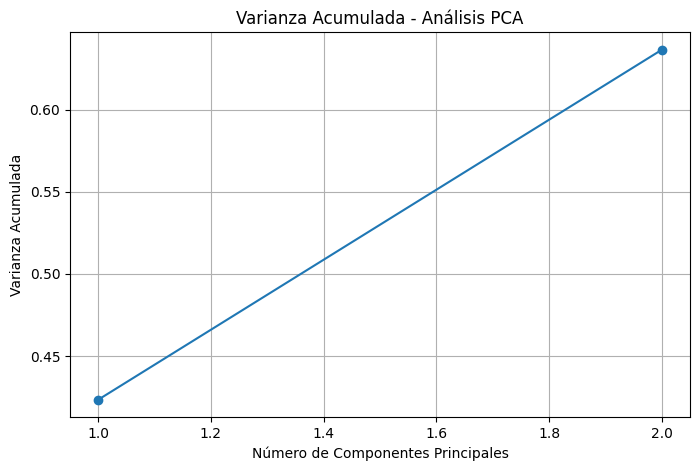

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

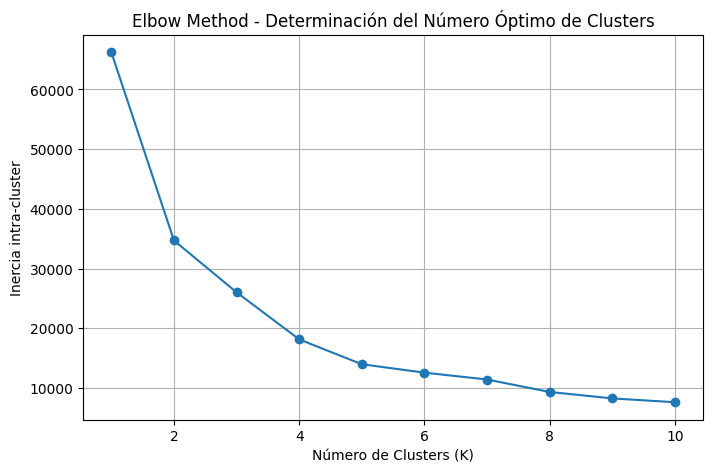

In [76]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

In [77]:
clusters = 3 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 3


In [78]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df_clean2['Cluster'] = kmeans.fit_predict(X_pca)

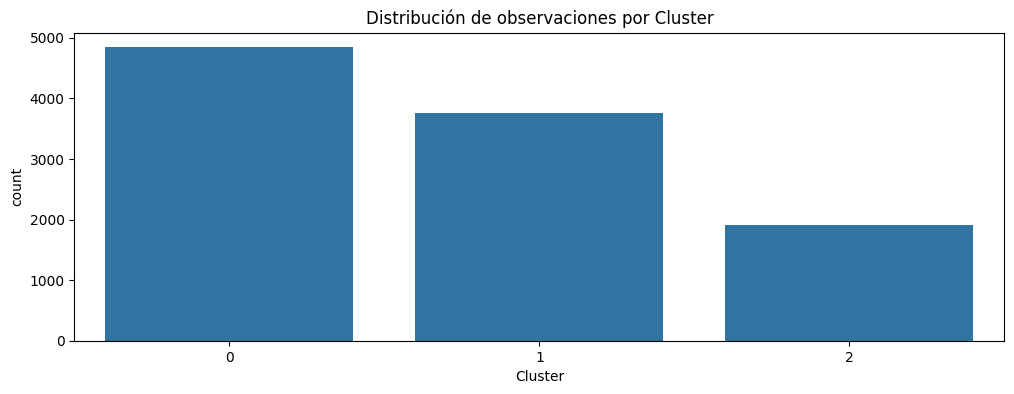

In [79]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df_clean2)
plt.title('Distribución de observaciones por Cluster')
plt.show()

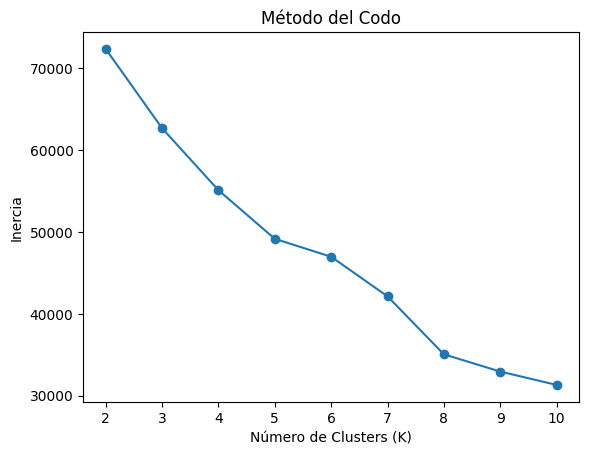

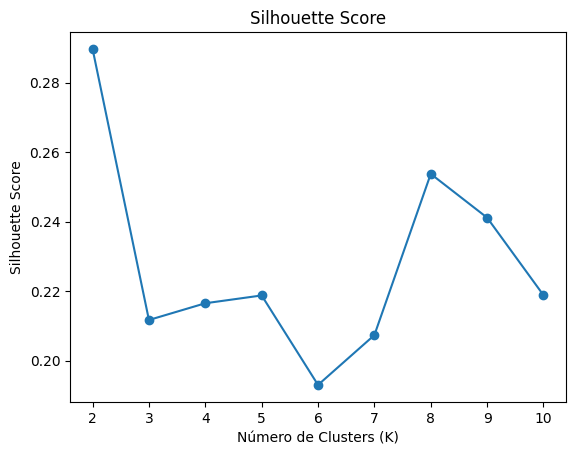

In [80]:
# Método del Codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

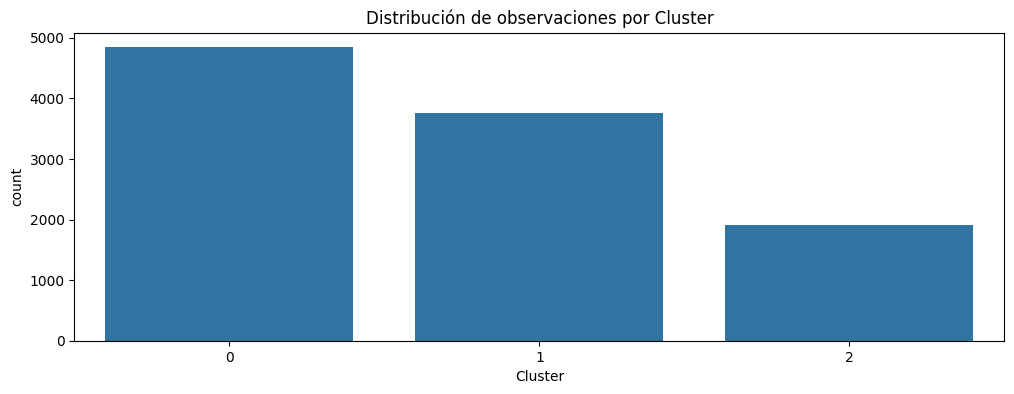

In [81]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df_clean2)
plt.title('Distribución de observaciones por Cluster')
plt.show()

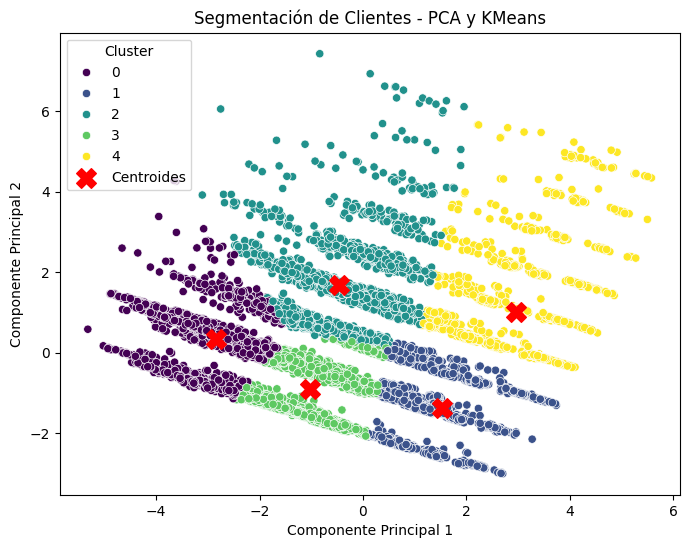

In [87]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title("Segmentación de Clientes - PCA y KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

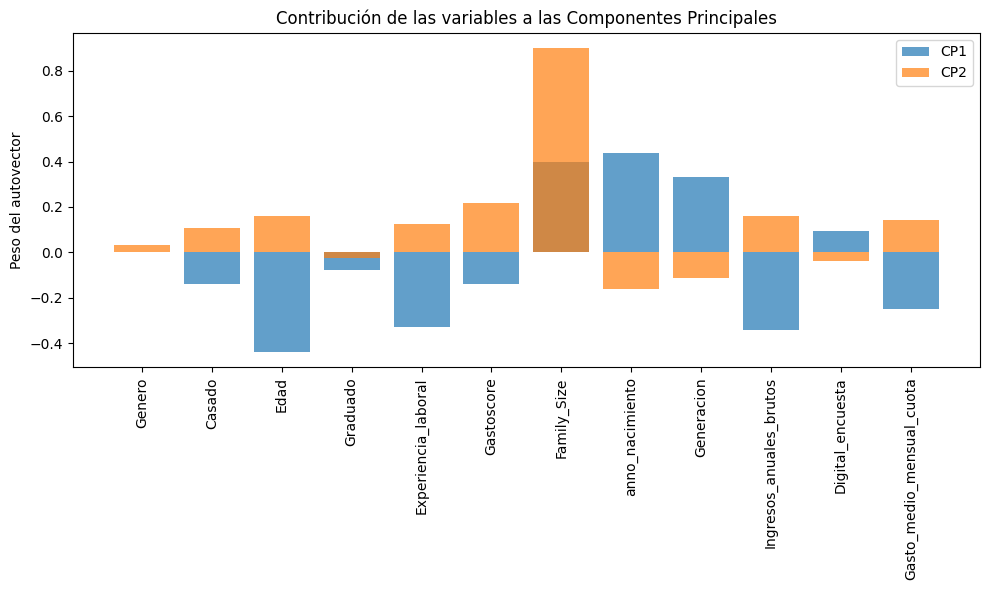

In [83]:
# Gráfico 2: Autovectores (componentes principales)
components = pca.components_
# Obtener los nombres reales de las variables desde X
features = X.columns.tolist()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(components[0])+1), components[0], alpha=0.7, label='CP1')
plt.bar(range(1, len(components[1])+1), components[1], alpha=0.7, label='CP2')
plt.xticks(range(1, len(features)+1), features, rotation=90)
plt.ylabel("Peso del autovector")
plt.title("Contribución de las variables a las Componentes Principales")
plt.legend()
plt.tight_layout()
plt.show()



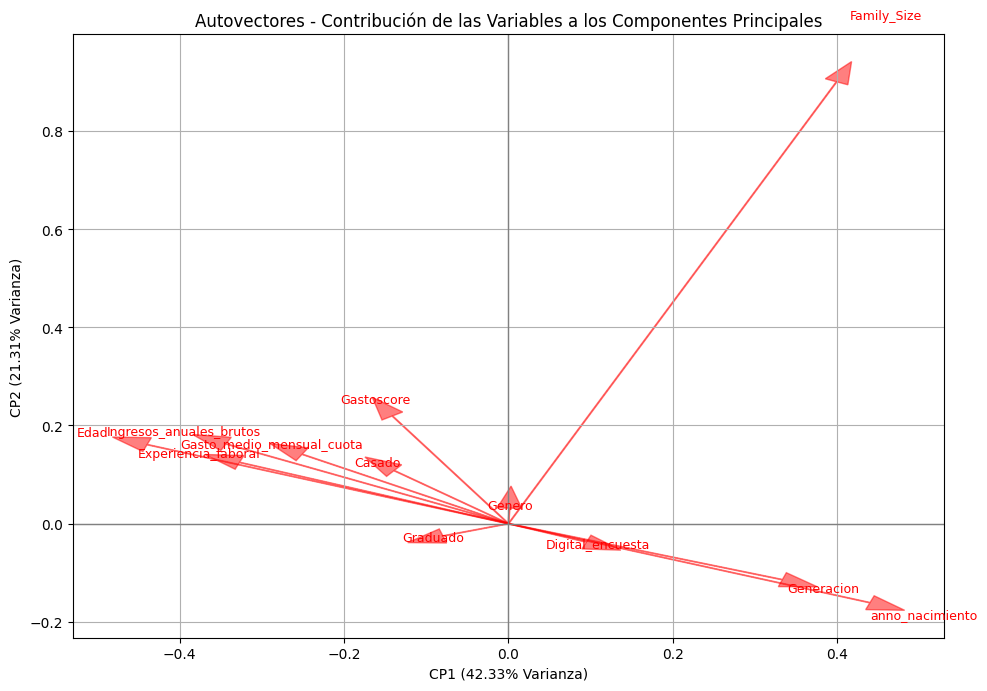

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Autovectores del PCA
components = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100  # porcentaje de varianza explicada

# Usar los nombres reales de las columnas del dataset X
features = np.array(X.columns.tolist())

plt.figure(figsize=(10, 7))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Dibujar los vectores (autovectores) con nombres reales
for i in range(len(features)):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15,
             features[i], color='r', ha='center', va='center', fontsize=9)

plt.xlabel(f"CP1 ({explained_variance[0]:.2f}% Varianza)")
plt.ylabel(f"CP2 ({explained_variance[1]:.2f}% Varianza)")
plt.title("Autovectores - Contribución de las Variables a los Componentes Principales")
plt.grid()
plt.tight_layout()
plt.show()
